In [2]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

# Import modules
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from ecbm4040.cifar_utils import load_data
from scipy import ndimage
import cv2

C:\Users\keert\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Load the raw CIFAR-10 data.
X_train, y_train, X_test, y_test = load_data()
num_train = 49000
num_val = 1000
num_test = 10000
num_dev = 128

# The development set is used for augmentation practices.
mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Seperate Training set into a training set and a validation set
X_val = X_train[num_train:]
y_val = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]

#print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)


X_train = X_train.reshape(X_train.shape[0], 3, 32, 32).transpose(0,2,3,1)
X_test = X_test.reshape(X_test.shape[0], 3, 32, 32).transpose(0,2,3,1)
X_val = X_val.reshape(X_val.shape[0], 3, 32, 32).transpose(0,2,3,1)
X_dev = X_dev.reshape(X_dev.shape[0], 3, 32, 32).transpose(0,2,3,1)



./data/cifar-10-python.tar.gz already exists. Begin extracting...


In [4]:
# Generate the kernel required
kernel_size = 3
Kernel_num = 1
Kernel  = np.random.rand(kernel_size,kernel_size,Kernel_num)
# Project the kernel onto a circle
def project_kernel(Kernel):
    Kernel_num = Kernel.shape[2]
    for i in range(Kernel_num):
        tmp = Kernel[:,:,i]
        if(np.linalg.norm(tmp,'fro')>0):
            Kernel[:,:,i]=Kernel[:,:,i]/np.linalg.norm(tmp,'fro')
        else:
            Kernel[:,:,i] = Kernel[:,:,i]
    return Kernel

A0 = project_kernel(Kernel)

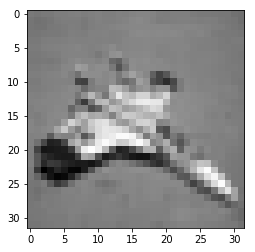

In [5]:
X_train_exp = X_train[30,:,:,:]

gray_image = cv2.cvtColor(X_train_exp, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image,cmap= 'gray')
output = ndimage.filters.convolve(gray_image,A0[:,:,0])



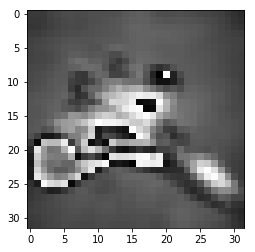

In [6]:
output_image = cv2.cvtColor(output, cv2.COLOR_GRAY2BGR)
plt.imshow(output_image)